# QBoost using EQC Models Package

#### Device: Dirac-3


## Introduction

The QBoost algorithm is a classification method that leverages open quantum systems (such as QCi's Dirac-3 machine) to obtain superior speed and power consumption over classical approaches. QBoost is an adaptation of the classical boosting algorithm. Boosting is a powerful technique in machine learning that combines the output of several weak classifiers to produce a strong classifier. In classical boosting algorithms, such as AdaBoost, the weights of the weak classifiers are adjusted iteratively based on their performance, with the goal of minimizing the overall classification error.

## Methodology

The idea is based on the concept of boosting. Let us assume that we have a collection of $N$ "weak" classifiers $h_i$ where $i=1, 2,...,N$. The goal is to construct a "strong" classifier as a linear superposition of these weak classifiers, that is,

$y = \sum_{i=1}^{N} w_i h_i({\bf{x}})$

where ${\bf{x}}$ is a vector of input features and $y \in \{-1, 1\}$, and $\sum_{i=1}^{N} w_i = 1$. The goal is to find an optimal set of $w_i$s, weights associated with the weak classifiers. 

Let us have a training set $\{({\bf{x_s}}, y_s) | s = 1, 2,...,S\}$ of size $S$. We can determine optimal weights $w_i$ by minimizing,

$\min_{w_i} \sum_{s=1}^{S} |\sum_{i=1}^{N} w_i h_i({\bf{x_s}}) - y_s|^2 + \lambda \sum_{i=1}^{N} (w_i)^2$

where the regularization term $\lambda \sum_{i=1}^{N} (w_i)^2$ penalizes non-zero weights; $\lambda$ is the regularization coefficient. 

$\min_{{\bf{w}}} \sum_{i=1}^{N} \sum_{j=1}^{N} J_{ij} w_i w_j + \sum_{i=1}^{N} C_i w_i$

where 

$J_{ij} = \sum_{s=1}^{S} h_i({\bf{x_s}}) h_j({\bf{x_s}})$

and

$C_{i} = -2 \sum_{s=1}^{S} y_s h_i({\bf{x_s}})$

subject to,

$\sum_{i=1}^{N} w_i = 1$

Note that the above algorithm assumes that the total number of weak classifiers, that is $N$, is less than the number of available qudits on Dirac-3. 


## Data

We used the IRIS dataset to build a binary classifier using QBoost. The reader can refer to 

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

and 

https://en.wikipedia.org/wiki/Iris_flower_data_set

for more information on the IRIS dataset.

## QBoost Implementation in QCI's EQC Models Package

The QCi's EQC Models package includes an implementation of the QBoost algorithm.

# Setting up the environment

The user should ensure that QCI_TOKEN and QCI_API_URL are set as the algorithm needs access to QCi's Dirac-3 device. 

# Import libraries

We start by importing some libraries. This includes importing the QBoostClassifier instance from the EQC Models ML package.

In [ ]:
import sys
from collections import Counter
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    accuracy_score,
)

from eqc_models.ml.classifierqboost import QBoostClassifier

# Setting parameters

The only parameter we need to set here is the train test split ratio. We have,

In [4]:
TEST_SIZE = 0.2

# Read Dataset

We can now load the IRIS data from scikit-learn dataset library. We have,

In [5]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Pre-Processing of the data

We now scale the features using a min/max scaler, and the classes to either 1 or -1 labels. The data is then splitted into training and testing sets.

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1
    elif y[i] == 2:
    	y[i] = 1
        
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=42,
)

We can echo some statitics on the training and testing sets,

In [11]:
print("Training data counts:")
print(Counter(y_train))

print("Testing data counts:")
print(Counter(y_test))

Training data counts:
Counter({1: 80, -1: 40})
Testing data counts:
Counter({1: 20, -1: 10})


# Train the model

We now instantiate the QBoost classifier object and train a model,

In [13]:
obj = QBoostClassifier(
    relaxation_schedule=2,
    num_samples=1,
    lambda_coef=0.0,
    weak_cls_type="lg",
)

obj.fit(X_train, y_train)

Runtime of _build_weak_classifiers: 0.03 seconds!
Built 10 weak classifiers!
Runtime of get_hamiltonian: 0.03 seconds!
2024-07-30 11:49:28 - Dirac allocation balance = 0 s (unmetered)
2024-07-30 11:49:28 - Job submitted: job_id='66a935b827d9cb8ae30094e6'
2024-07-30 11:49:28 - RUNNING
2024-07-30 11:49:39 - COMPLETED
2024-07-30 11:49:41 - Dirac allocation balance = 0 s (unmetered)
{'job_info': {'job_id': '66a935b827d9cb8ae30094e6', 'job_submission': {'problem_config': {'normalized_qudit_hamiltonian_optimization': {'polynomial_file_id': '66a935b811ecab62cc23eaa4'}}, 'device_config': {'dirac-3': {'num_samples': 1, 'relaxation_schedule': 2, 'solution_precision': 1, 'sum_constraint': 1}}}, 'job_status': {'submitted_at_rfc3339nano': '2024-07-30T18:49:28.822Z', 'queued_at_rfc3339nano': '2024-07-30T18:49:28.822Z', 'running_at_rfc3339nano': '2024-07-30T18:49:28.879Z', 'completed_at_rfc3339nano': '2024-07-30T18:49:37.142Z'}, 'job_result': {'file_id': '66a935c111ecab62cc23eaa6', 'device_usage_s': 

# Results

We can now use the model to get predictions on the training and testing datasets,

In [14]:
y_train_prd = obj.predict(X_train)
y_test_prd = obj.predict(X_test)

and use the predictions to calculate precision, recall, and accuracy.

Train precision: 1.0
Train recall: 1.0
Train accuracy: 1.0


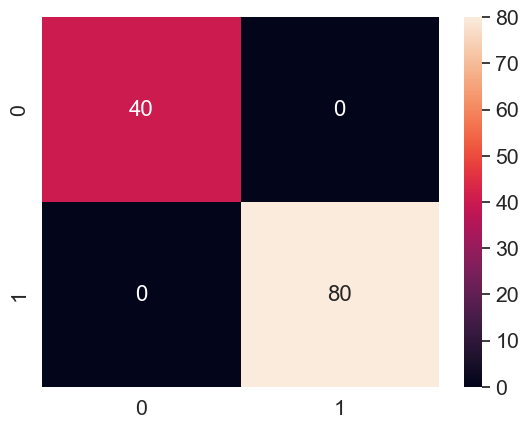

Test precision: 1.0
Test recall: 1.0
Test accuracy: 1.0


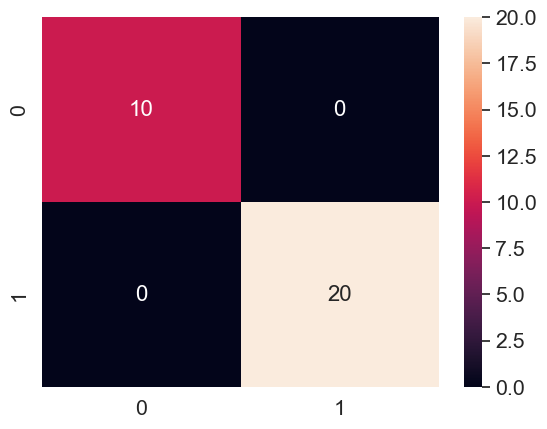

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

print(
    "Train precision:",
    precision_score(y_train, y_train_prd, labels=[-1, 1], pos_label=1),
)
print(
    "Train recall:",
    recall_score(y_train, y_train_prd, labels=[-1, 1], pos_label=1),
)
print(
    "Train accuracy:",
    accuracy_score(y_train, y_train_prd),
)

sn.set(font_scale=1.4)
train_conf_mat = confusion_matrix(y_train, y_train_prd, labels=[-1, 1])
sn.heatmap(train_conf_mat, annot=True, annot_kws={"size": 16})
plt.show()

print(
    "Test precision:",
    precision_score(y_test, y_test_prd, labels=[-1, 1], pos_label=1),
)
print(
    "Test recall:",
    recall_score(y_test, y_test_prd, labels=[-1, 1], pos_label=1),
)
print(
    "Test accuracy:",
    accuracy_score(y_test, y_test_prd),
)

test_conf_mat = confusion_matrix(y_test, y_test_prd, labels=[-1, 1])
sn.heatmap(test_conf_mat, annot=True, annot_kws={"size": 16})
plt.show()